### **Предварительная подготовка**

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab import files

Загружаем необходимый файл/файлы для работы.

In [46]:
uploaded = files.upload()

Saving sales_train.csv to sales_train (1).csv
Saving advert_train.csv to advert_train (1).csv


Считываем данные из файлов в dataframe'ы

In [47]:
advert_train_df = pd.read_csv(io.StringIO(uploaded['advert_train.csv'].decode('utf-8')))
sales_train_df = pd.read_csv(io.StringIO(uploaded['sales_train.csv'].decode('utf-8')))

Приведем типы данных

In [48]:
advert_train_df['date'] = pd.to_datetime(advert_train_df['date'])
sales_train_df['date'] = pd.to_datetime(sales_train_df['date'])

Выведем информаицю для каждого dataframe

### **Advert train**


In [49]:
advert_train_df.info()
advert_train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2921 non-null   datetime64[ns]
 1   market_1  2921 non-null   int64         
 2   market_2  2921 non-null   int64         
 3   market_3  2921 non-null   int64         
 4   market_4  2921 non-null   int64         
 5   market_5  2921 non-null   int64         
 6   market_6  2921 non-null   int64         
 7   market_7  2921 non-null   int64         
 8   market_8  2921 non-null   int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 205.5 KB


,date,market_1,market_2,market_3,market_4,market_5,market_6,market_7,market_8
0,2008-01-02,0,0,0,0,0,0,0,0
1,2008-01-03,0,0,0,0,0,0,0,0
2,2008-01-04,0,0,0,0,0,0,0,0
3,2008-01-05,0,0,0,0,0,0,0,0
4,2008-01-06,0,0,0,0,0,0,0,0


In [50]:
advert_train_df.describe()

,market_1,market_2,market_3,market_4,market_5,market_6,market_7,market_8
count,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000
mean,0.002054,0.001369,0.002739,0.000685,0.002054,0.000685,0.003081,0.003081
std,0.045283,0.036986,0.052271,0.026162,0.045283,0.026162,0.055432,0.055432
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Поиск отсутсвующих значений

In [51]:
advert_train_df.isnull().drop(['date'], axis=1).sum()

market_1    0
market_2    0
market_3    0
market_4    0
market_5    0
market_6    0
market_7    0
market_8    0
dtype: int64

Получим количество акциий в каждом магазине

In [61]:
advert_train_df.drop(['date'], axis=1).sum()

market_1    6
market_2    4
market_3    8
market_4    2
market_5    6
market_6    2
market_7    9
market_8    9
dtype: int64

Максимальное число акциий **9** было проведено в **market_8 и market_7**

Минимальное число акций **2** было проведено в **market_4 и market_6**

Корреляция

In [53]:
advert_train_df.corr()

,market_1,market_2,market_3,market_4,market_5,market_6,market_7,market_8
market_1,1.000000,-0.001680,-0.002378,-0.001188,-0.002058,0.287883,-0.002522,-0.002522
market_2,-0.001680,1.000000,-0.001941,-0.000969,-0.001680,-0.000969,-0.002059,-0.002059
market_3,-0.002378,-0.001941,1.000000,-0.001372,-0.002378,-0.001372,-0.002913,-0.002913
market_4,-0.001188,-0.000969,-0.001372,1.000000,-0.001188,-0.000685,-0.001455,-0.001455
market_5,-0.002058,-0.001680,-0.002378,-0.001188,1.000000,-0.001188,-0.002522,-0.002522
market_6,0.287883,-0.000969,-0.001372,-0.000685,-0.001188,1.000000,-0.001455,-0.001455
market_7,-0.002522,-0.002059,-0.002913,-0.001455,-0.002522,-0.001455,1.000000,-0.003091
market_8,-0.002522,-0.002059,-0.002913,-0.001455,-0.002522,-0.001455,-0.003091,1.000000


По графику корреляции видно, что акции проходили не зависимо от других магазинов

Выводы


*  Максимальное число акциий **9** было проведено в **market_8 и market_7**

*   Минимальное число акций **2** было проведено в **market_4 и market_6**

* По графику корреляции видно, что акции проходили не зависимо от других магазинов


### **Sales train**

In [54]:
sales_train_df.info()
sales_train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2921 non-null   datetime64[ns]
 1   market_1  2318 non-null   float64       
 2   market_2  2320 non-null   float64       
 3   market_3  2355 non-null   float64       
 4   market_4  2320 non-null   float64       
 5   market_5  2347 non-null   float64       
 6   market_6  2301 non-null   float64       
 7   market_7  2348 non-null   float64       
 8   market_8  2370 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 205.5 KB


,date,market_1,market_2,market_3,market_4,market_5,market_6,market_7,market_8
0,2008-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2008-01-03,NaN,1.006943,1.002595,1.006953,1.014819,NaN,1.008989,1.003241
2,2008-01-04,1.015188,NaN,1.043535,1.044507,1.050865,1.025508,1.037337,1.024117
3,2008-01-05,NaN,1.045076,NaN,1.080214,1.071665,NaN,NaN,1.028124
4,2008-01-06,0.995762,1.000988,1.051633,1.056388,1.047756,1.002896,1.027538,0.990433


Обращаем внимание, что не во всех магазинах данные проставлены полностью

In [55]:
sales_train_df.describe()

,market_1,market_2,market_3,market_4,market_5,market_6,market_7,market_8
count,2318.000000,2320.000000,2355.000000,2320.000000,2347.000000,2301.000000,2348.000000,2370.000000
mean,1.679924,2.382302,1.785479,2.084432,2.351293,2.310386,1.788906,2.545632
std,0.415762,0.603411,0.435667,0.924918,0.829402,0.898197,0.742181,0.924786
min,0.937147,0.989628,0.951383,0.862978,1.000000,0.856543,0.558537,0.894445
25%,1.339669,1.905707,1.465732,1.319057,1.634398,1.504911,1.202137,1.840781
50%,1.656322,2.316259,1.706630,1.844848,2.120974,2.196724,1.625944,2.409829
75%,1.977632,2.817650,2.028506,2.453868,2.994378,3.130042,2.349546,3.040654
max,2.766316,3.814635,3.037881,4.272993,4.394967,4.114637,3.446461,4.746889


Поиск отсутсвующих значений

In [56]:
sales_train_df.isnull().drop(['date'], axis=1).sum()

market_1    603
market_2    601
market_3    566
market_4    601
market_5    574
market_6    620
market_7    573
market_8    551
dtype: int64

In [57]:
print("Отсутсвует ", sales_train_df.drop(['date'], axis=1).isnull().sum().mean() / len(sales_train_df) * 100, "% данных")

Отсутсвует  20.065902088325917 % данных


Достаточно большое количество данных отсутсвует, это может привести к неправильным выводам о работе магазинов и ошибках в планировании их дальнейшей работы.

Корреляция

In [58]:
sales_train_df.corr()

,market_1,market_2,market_3,market_4,market_5,market_6,market_7,market_8
market_1,1.000000,0.922756,0.944945,0.911468,0.895432,0.937341,0.920293,0.946656
market_2,0.922756,1.000000,0.954128,0.915763,0.927509,0.915023,0.918351,0.921142
market_3,0.944945,0.954128,1.000000,0.946054,0.946704,0.929754,0.940149,0.950947
market_4,0.911468,0.915763,0.946054,1.000000,0.965394,0.943065,0.967208,0.970064
market_5,0.895432,0.927509,0.946704,0.965394,1.000000,0.956823,0.954327,0.954043
market_6,0.937341,0.915023,0.929754,0.943065,0.956823,1.000000,0.949356,0.962788
market_7,0.920293,0.918351,0.940149,0.967208,0.954327,0.949356,1.000000,0.959881
market_8,0.946656,0.921142,0.950947,0.970064,0.954043,0.962788,0.959881,1.000000


Можно заметить, что корреляция между магазинов высокая. Это означает, что магазины связаны между собой

Графики продаж

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


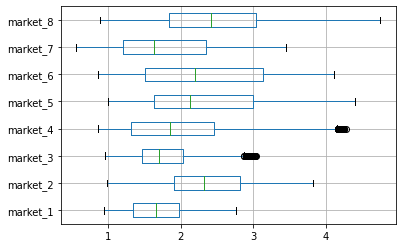

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d0e4e16d0>,
      dtype=object)

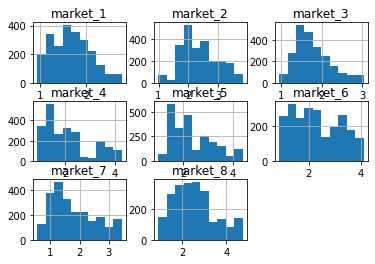

In [59]:
sales_train_df.boxplot(vert=False)
plt.show()
sales_train_df.drop(['date'], axis=1).hist()

Исходя из графиков можно сделать выводы:


*   *market_8* имеет самые лучшие показатели роста и максимальный и средний индекс продаж
*   Пик продаж приходится на один и тот же период у всех магазинов
*   *market_1* и *market_2* имеют проблемы с показателями роста продаж


